<a href="https://colab.research.google.com/github/Dawann-Bernardes/Pos_DataScience_PUCRIO_II/blob/main/MVP_DAWANN_BERNARDES_B_R_V_DE_AZEVEDO_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto de Analise de Concessão de Crédito**

## Descrição do problema:

Identificar clientes onde teremos oportunidade de conceder crédito, com isso, reduzir o índice de inadimplência na melhora da escolha dos clientes.

## Hipóteses

Qual cliente podemos conceder? 1 = "Sim", 0 = "Não".

## Atributos do Dataset:

**Idade:**	Idade do Cliente

**Genero:**	Genero do Cliente

**Escolaridade:**	Escolaridade do Cliente

**Tipo_Moradia:**	Tipo_Moradia do Cliente

**Saldo_Investimento:**	Saldo_Investimento do Cliente

**Saldo_Conta_Corrente:**	Saldo_Conta_Corrente do Cliente

**Valor_Emprestimo:**	Valor_Emprestimo do Cliente

**Duracao_Emprestimo:**	Duracao_Emprestimo do Cliente

**Default:**	Concede ou Não o Crédito


# **Análise de dados**

## Importação Packages e DataFrame

In [131]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Packages Externos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Métricas de Desempenho
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [132]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/Dawann-Bernardes/Pos_DataScience_PUCRIO_II/refs/heads/main/emprestimos.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=';')

## Quantos atributos e instâncias existem?

Há 1000 Linhas e 9 Colunas.

In [133]:
dataset.shape

(1000, 9)

## Há valores nulos?

Não há nulos.

In [134]:
dataset.isnull().sum()

,0
Idade,0
Genero,0
Escolaridade,0
Tipo_Moradia,0
Saldo_Investimento,0
Saldo_Conta_Corrente,0
Valor_Emprestimo,0
Duracao_Emprestimo,0
Default,0


## Há dados duplicados?

Não.

In [135]:
dataset.duplicated().sum()

0

## Quais são os tipos de dados dos atributos?

In [136]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Idade                 1000 non-null   int64 
 1   Genero                1000 non-null   object
 2   Escolaridade          1000 non-null   object
 3   Tipo_Moradia          1000 non-null   object
 4   Saldo_Investimento    1000 non-null   object
 5   Saldo_Conta_Corrente  1000 non-null   object
 6   Valor_Emprestimo      1000 non-null   int64 
 7   Duracao_Emprestimo    1000 non-null   int64 
 8   Default               1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


## Verifique as primeiras linhas do dataset. Algo chama a atenção?

Não, tudo conforme suas características.

In [137]:
# Tipo de Variaveis
dataset.head()

,Idade,Genero,Escolaridade,Tipo_Moradia,Saldo_Investimento,Saldo_Conta_Corrente,Valor_Emprestimo,Duracao_Emprestimo,Default
0,67,M,Graduacao,Propria,Sem investimento,Pouco,1169,6,0
1,22,H,Graduacao,Propria,Pouco,Moderado,5951,48,1
2,49,M,Pos Graduacao,Propria,Pouco,Sem conta,2096,12,0
3,45,M,Graduacao,De favor,Pouco,Pouco,7882,42,0
4,53,M,Graduacao,De favor,Pouco,Pouco,4870,24,1


In [138]:
dataset['Default'].value_counts()

,count
Default,
0,700
1,300


# **Preparação dos Dados**

Vimos que o dataset possui 5 instâncias categóricas, temos que tratá-las para não haver erros no treinamento.

In [139]:
# Target (variável resposta)
y_var = 'Default'
y = dataset[y_var].astype(int)

# Features (variáveis explicativas)
# Variáveis Numéricas
x_var_num = [
    'Idade', 'Valor_Emprestimo', 'Duracao_Emprestimo'
    ]
x_num = dataset[x_var_num].to_numpy()

# Variáveis Categóricas / Qualitativas
x_var_cat = [
    'Genero', 'Escolaridade', 'Tipo_Moradia',
    'Saldo_Investimento','Saldo_Conta_Corrente'
            ]
x_cat = dataset[x_var_cat]

Na célula acima separamos o que são variáveis categóricas para utilizar o OneHotEnconder para transformá-las em numéricas.

In [140]:
# Criação das variáveis dummies para variáveis categóricas
x_cat_enc = OneHotEncoder()
x_cat = x_cat_enc.fit_transform(x_cat).toarray()

# Unificação da base de dados
X = np.concatenate([x_num, x_cat], axis=1)

Tratamos os dados categóricos que incluímos junto com as variáveis numéricas.

In [141]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'roc_auc'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

Na célula acima separamos os dados de treino e teste com uma validação cruzada com embaralhará os dados a cada extração de 1 amostra a cada 10.

# **Modelagem e treinamento**

Aqui utilizaremos os modelos mais utilizados juntamento com os ensables de randomforest, votting (LR, Arvore e SVM), adaboost, gradientboosting, etc) para escolhermos o melhor para utilizar a feature selection.

LR: 0.736086 (0.081464)
KNN: 0.576935 (0.077868)
CART: 0.568750 (0.053097)
NB: 0.725967 (0.073489)
SVM: 0.541741 (0.092404)
Bagging: 0.715513 (0.088512)
RF: 0.706734 (0.064248)
ET: 0.677158 (0.064154)
Ada: 0.686942 (0.082906)
GB: 0.727567 (0.074917)
Voting: nan (nan)


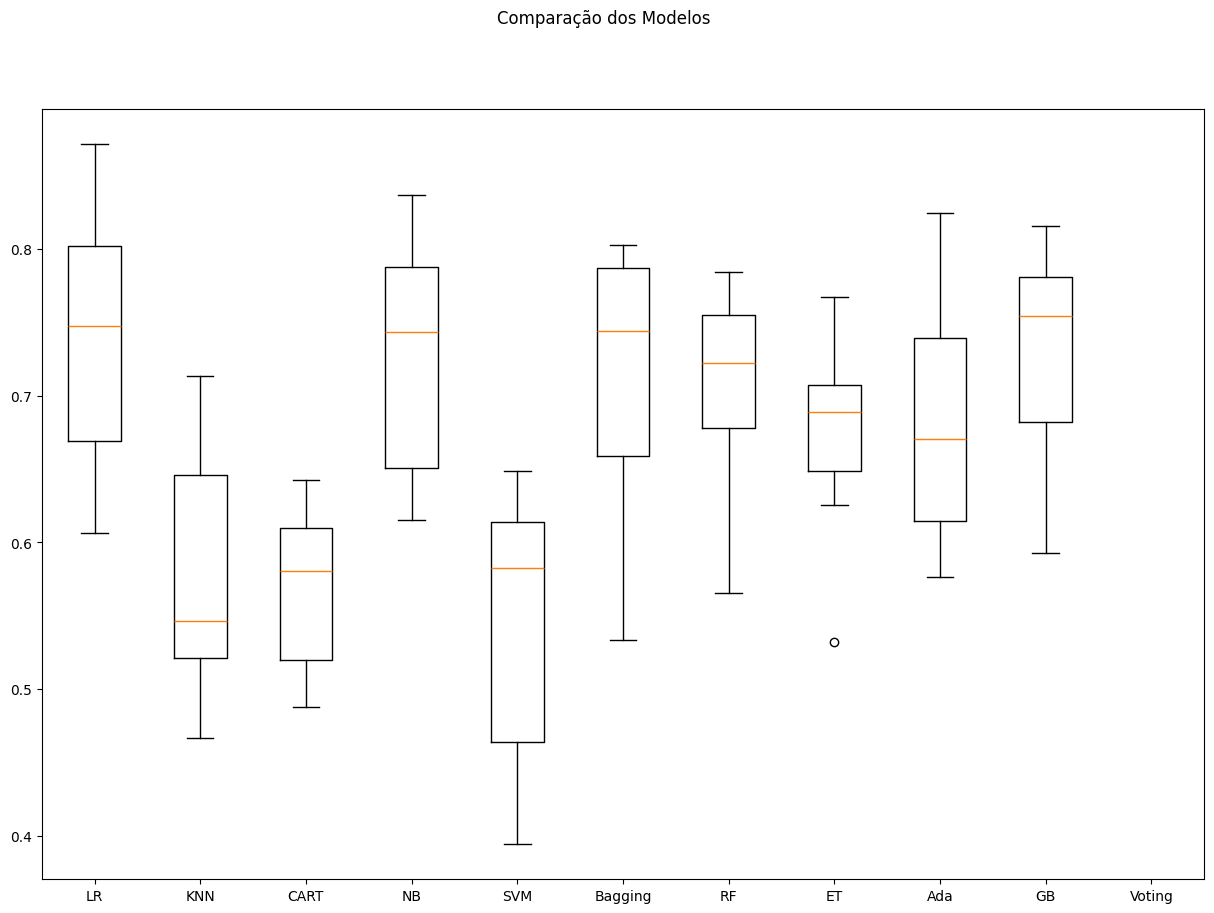

In [142]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Acima testemos diversos modelos de classificação e utilizamos o scoring para a validação cruzada o AUC ROC, pois a acurácia não funciona bem para dados desbalanceados. o AUC consegue equilibrar bem os valores de alto verdadeiro positivo e baixo falso positivo.

O melhor modelo foi a regressão logítica na média dos resultados mensurados.

In [143]:
# Tuning do LR

# Definição do dicionário de parâmetros
param_grid = param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Valores para o parâmetro de regularização
    'penalty': ['l1', 'l2'],  # Tipo de regularização
    'solver': ['liblinear', 'saga']  # Algoritmo de otimização
}

modelo_grid = GridSearchCV(estimator=models[0][1],
                           param_grid=param_grid,
                           n_jobs=4,
                           cv=kfold,
                           verbose=4)

modelo_grid.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=7, shuffle=True),
             estimator=LogisticRegression(max_iter=200), n_jobs=4,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=4)

Realiza a seleção dos hiperparametros da Regressão Logísitica.

In [144]:
# imprime a melhor configuração
print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, modelo_grid.best_score_, modelo_grid.best_params_))

Sem tratamento de missings: Voting - Melhor: 0.736250 usando {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [145]:
modelo_grid.best_estimator_

LogisticRegression(C=1, max_iter=200, solver='liblinear')

# **Avaliação de Resultados**

In [146]:
# Função para cálculo do desempenho de modelos
def calcula_desempenho(modelo, x_train, y_train, x_test, y_test):
    """
    Calcula o desempenho de um modelo de classificação.
    """
    try:
        # Cálculo dos valores preditos
        ypred_train = modelo.predict(x_train)
        ypred_proba_train = modelo.predict_proba(x_train)[:,1]

        ypred_test = modelo.predict(x_test)
        ypred_proba_test = modelo.predict_proba(x_test)[:,1]

    except Exception as e:
        print(f'Modelo não suportado: {e}')
        return None

    # Métricas de Desempenho
    acc_train = accuracy_score(y_train, ypred_train)
    acc_test = accuracy_score(y_test, ypred_test)

    roc_train = roc_auc_score(y_train, ypred_proba_train)
    roc_test = roc_auc_score(y_test, ypred_proba_test)

    prec_train = precision_score(y_train, ypred_train, zero_division=0)
    prec_test = precision_score(y_test, ypred_test, zero_division=0)

    recl_train = recall_score(y_train, ypred_train)
    recl_test = recall_score(y_test, ypred_test)

    f1_train = f1_score(y_train, ypred_train)
    f1_test = f1_score(y_test, ypred_test)

    df_desemp = pd.DataFrame({'Treino':[acc_train, roc_train, prec_train, recl_train, f1_train],
                              'Teste':[acc_test, roc_test, prec_test, recl_test, f1_test]},
                            index=['Acurácia','AUROC','Precision','Recall','F1'])

    df_desemp['Variação'] = round(df_desemp['Teste'] / df_desemp['Treino'] - 1, 2)

    return df_desemp

In [147]:
modelo_grid_desemp = calcula_desempenho(modelo_grid.best_estimator_,
                                                  X_train, y_train,
                                                  X_test,  y_test)
modelo_grid_desemp

,Treino,Teste,Variação
Acurácia,0.743750,0.785000,0.06
AUROC,0.759234,0.815833,0.07
Precision,0.622378,0.729730,0.17
Recall,0.370833,0.450000,0.21
F1,0.464752,0.556701,0.20


AUROC: O modelo apresentou um AUROC de 0.758 no treino e 0.816 no teste. Isso indica uma boa capacidade de discriminação entre as classes, com uma melhora considerável no conjunto de teste.

Na acurácia, pra nossa base pode ser perigosa, pois não há um equilibrio entre as classes.

Não houve overfitting, pois desempenhou até melhor que o esperado nos dados não vistos (teste)